In [7]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.patches as mpatches

# Define an Action and State space

In [2]:
# action state = the different prices 
action_states = [200, 100, 50]

# corresponding probabilities 
probabilities = [0.1,0.5,0.8]

# time periods from 500 to 0 - as it starts from time 0 
time_periods = list(range(500, -1, -1))

# Inventory from 0 to 100 
state_space = list(range(100, -1,-1))

# That is the value table (V)
V = np.full((len(state_space), len(time_periods)), 0.0)

# Optimal Policy Table 
alpha = np.full((len(state_space), len(time_periods)), np.nan)

In [3]:
# Loop over the time periods but backwards 
for t in time_periods[1: ]:

    # Loop over each state, for each time point
    for x in state_space:
        
        action_values = []  
        actions_taken = []
        
        # Loop over each action for each state at each time point    
        for i , price in enumerate(action_states):
           
            # Probability of sale for this price
            sale_prob = probabilities[i]  
            
            # Checks if we still have inventory 
            if x > 0: 
                action_value =  sale_prob * price  + (sale_prob * V[x - 1, t + 1]) + (1 - sale_prob) * V[x, t + 1]
            
            # Cant sell items we dont have
            else: 
                action_value = V[x,t + 1 ]
            
            action_values.append(action_value)
            actions_taken.append(price)

        # Extracting the max value and the max action which brings the value 
        max_value = max(action_values)
        best_action = actions_taken[action_values.index(max_value)]
        
        # Update the Value table and the optimal policy table 
        V[x, t] = max_value
        alpha[x, t] = best_action
        
        # makes a restriction of setting the values to 0 which are not possible, cant have a value for inventory 98 
        if t < 100: 
            index =  100 - t 
            V[0 : index, t] = 0 
            alpha[0 : index, t] = np.nan

In [4]:
# Value table
V_df = pd.DataFrame(V)
V_df.index.name = "State"
V_df.columns.name = "Time"
V_df.loc[::-1]

Time,0,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,500
State,,,,,,,,,,,,,,,,,,,,,
100,13715.793105,13703.293105,13690.793105,13678.293105,13665.793105,13653.293105,13640.793105,13628.293105,13615.793105,13603.293105,...,450.000000,400.000000,350.00000,300.0000,250.000,200.00,150.0,100.0,50.0,0.0
99,0.000000,13628.293105,13615.793105,13603.293105,13590.793105,13578.293105,13565.793105,13553.293105,13540.793105,13528.293105,...,450.000000,400.000000,350.00000,300.0000,250.000,200.00,150.0,100.0,50.0,0.0
98,0.000000,0.000000,13540.793105,13528.293105,13515.793105,13503.293105,13490.793105,13478.293105,13465.793105,13453.293105,...,450.000000,400.000000,350.00000,300.0000,250.000,200.00,150.0,100.0,50.0,0.0
97,0.000000,0.000000,0.000000,13453.293105,13440.793105,13428.293105,13415.793105,13403.293105,13390.793105,13378.293105,...,450.000000,400.000000,350.00000,300.0000,250.000,200.00,150.0,100.0,50.0,0.0
96,0.000000,0.000000,0.000000,0.000000,13365.793105,13353.293105,13340.793105,13328.293105,13315.793105,13303.293105,...,450.000000,400.000000,350.00000,300.0000,250.000,200.00,150.0,100.0,50.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,369.284063,347.750000,320.93750,287.5000,246.875,200.00,150.0,100.0,50.0,0.0
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,304.901688,290.818125,274.56250,254.3750,228.125,193.75,150.0,100.0,50.0,0.0
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,230.443713,218.985250,207.07375,194.7500,180.625,162.50,137.5,100.0,50.0,0.0


In [5]:
# Policy table 
alpha_df = pd.DataFrame(alpha)
alpha_df.index.name = "State"
alpha_df.columns.name = "Time"
alpha_df.loc[::-1]

Time,0,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,500
State,,,,,,,,,,,,,,,,,,,,,
100,200.0,200.0,200.0,200.0,200.0,200.0,200.0,200.0,200.0,200.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,NaN
99,NaN,200.0,200.0,200.0,200.0,200.0,200.0,200.0,200.0,200.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,NaN
98,NaN,NaN,200.0,200.0,200.0,200.0,200.0,200.0,200.0,200.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,NaN
97,NaN,NaN,NaN,200.0,200.0,200.0,200.0,200.0,200.0,200.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,NaN
96,NaN,NaN,NaN,NaN,200.0,200.0,200.0,200.0,200.0,200.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,200.0,200.0,200.0,100.0,100.0,100.0,100.0,100.0,100.0,NaN


C:\Users\agdse\AppData\Local\Temp\ipykernel_21732\123568516.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('viridis', 3)


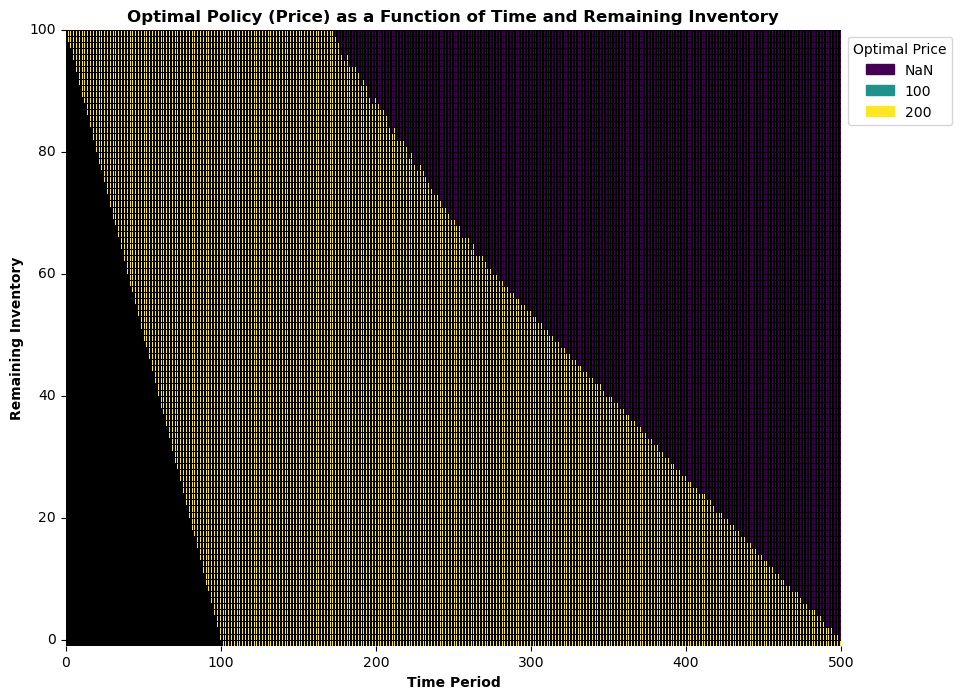

In [8]:
# Plotting the Optimal Policy
alpha_resampled = alpha_df.iloc[:, :-1]

cmap = plt.cm.get_cmap('viridis', 3)
cmap.set_bad(color='black')

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(alpha_resampled.loc[::-1], cmap=cmap, linewidths=0.4, linecolor='k', cbar=False)

# Create custom legend
legend_patches = [
    mpatches.Patch(color=cmap(0), label='NaN'),
    mpatches.Patch(color=cmap(1), label='100'),
    mpatches.Patch(color=cmap(2), label='200')
]

plt.legend(handles=legend_patches, loc='upper left', bbox_to_anchor=(1, 1), title='Optimal Price')

# Add labels and title
plt.xlabel('Time Period', fontweight='bold')
plt.ylabel('Remaining Inventory', fontweight='bold')
plt.title('Optimal Policy (Price) as a Function of Time and Remaining Inventory', fontweight='bold')

# Set custom ticks for x and y axes
plt.xticks(ticks=[0, 100, 200, 300, 400, 500], labels=[0, 100, 200, 300, 400, 500], rotation=0)
plt.yticks(ticks=[100, 80, 60, 40, 20, 0], labels=[0, 20, 40, 60, 80, 100])

plt.savefig('Optimal_Policy_first_problem.png')
plt.show()

# Simulation

In [11]:

num_simulations = 1000
max_time = 500
max_inventory = 100

results = []
time_results = []

for sim in range(num_simulations):
    
    inventory = max_inventory
    total_rewards = 0 
    
    for t in range(max_time):
        time_passed = t
         
        if inventory < 0: 
            break
             
        price = alpha[inventory, t]
        
        action_index = action_states.index(price)
        sales_prob = probabilities[action_index]
        
        random_number = np.random.rand()

        
        if random_number < sales_prob: 
            inventory -= 1
            total_rewards += price
    time_results.append(time_passed)
    results.append(total_rewards)

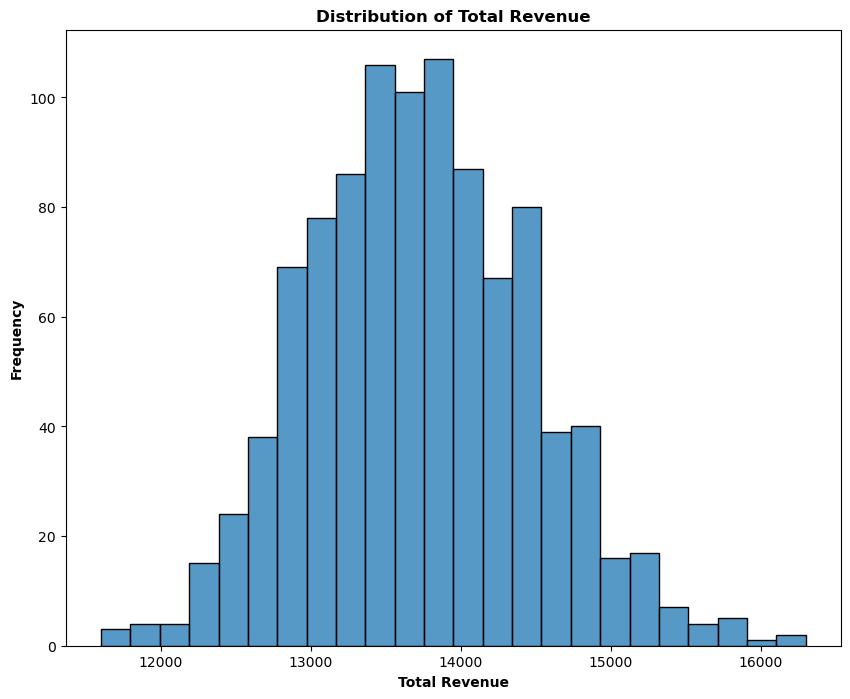

In [12]:
#Plotting the histogram
plt.figure(figsize=(10, 8))
sns.histplot(results)
plt.xlabel('Total Revenue', fontweight = 'bold')
plt.ylabel('Frequency', fontweight='bold')
plt.title('Distribution of Total Revenue', fontweight = 'bold')

# save figure 
plt.savefig('Total_Revenue.png')

# Constrained inventory problem 
### Monotonic price policy:
Once the item price has been reduced the price can only stay the price or reduce 

In [14]:
from itertools import product 

Problem set Up

In [15]:
# time period 
time_periods = list(range(500, -1, -1))

# possible actions and their corresponding probabilities 
actions = [200, 100, 50] # prices for item 
a_prob = [0.1, 0.5, 0.8]

# possible states
states = list(range(100, -1, -1))
# new state space required for constrianed problem 
# X = {0, 1, ... , 100}x{200, 100, 50}
state_space = list(product(states, actions))

# Value table V(state, price, time) and policy table (alpha)
V2 = np.zeros((len(states), len(actions), len(time_periods)), dtype=float)
alpha2 = V2.copy()


Backwards recursion algorithm with price constraint

In [16]:
# select possible action give the current price at state s
def get_possible_actions(price):
    if price == 200: return [200, 100, 50]
    if price == 100: return [100, 50]
    else: return [50]

# loop backwards through time
for t in time_periods[1:]:
    # loop through the statet space
    for s in states:
        # loop throught the prices and their indxs
        for pidx, p in enumerate(actions):
            
            # loop through possible actions 
            for action in get_possible_actions(p):

                # get action probability and action idx 
                prob = a_prob[actions.index(action)]
                action_idx = actions.index(action)
                
                # find expected value constrained to the inventory and action state 
                if s == 0:
                    exp_value = 0 + V2[s, action_idx, t+1]
                else: 
                    exp_value = action*prob + prob*V2[s-1, action_idx, t+1] + (1 - prob)*V2[s, action_idx, t+1]
                
                # update value table and policy if expected value is higher than current 
                if exp_value > V2[s, pidx, t]:
                    V2[s, pidx, t] = exp_value
                    alpha2[s, pidx, t] = action

# Adjust Value and policy table to constrain: max one sale per time frame
for t in range(101):
    for p in range(3):
        V2[: 100 - t, p, t] = 0
        alpha2[: 100 - t:, p, t] = np.nan

In [17]:
# Value table 
index = pd.MultiIndex.from_product([list(range(101)), actions], names = ["States", "Prices"])
V2_df = pd.DataFrame(V2.reshape(303, 501), index = index)
V2_df.columns.name = "Time"
V2_df.sort_index(level = 0)[::-1]

Time                    0             1             2             3    \
States Prices                                                           
100    200     13566.465907  13553.785741  13541.105764  13528.425976   
       100     10000.000000  10000.000000  10000.000000  10000.000000   
       50       5000.000000   5000.000000   5000.000000   5000.000000   
99     200         0.000000  13480.587405  13467.905534  13455.223857   
       100         0.000000   9900.000000   9900.000000   9900.000000   
...                     ...           ...           ...           ...   
1      100         0.000000      0.000000      0.000000      0.000000   
       50          0.000000      0.000000      0.000000      0.000000   
0      200         0.000000      0.000000      0.000000      0.000000   
       100         0.000000      0.000000      0.000000      0.000000   
       50          0.000000      0.000000      0.000000      0.000000   

Time                    4             5             6             7    \
States Prices                                                           
100    200     13515.746376  13503.066965  13490.387741  13477.708705   
       100     10000.000000  10000.000000  10000.000000  10000.000000   
       50       5000.000000   5000.000000   5000.000000   5000.000000   
99     200     13442.542372  13429.861079  13417.179978  13404.499069   
       100      9900.000000   9900.000000   9900.000000   9900.000000   
...                     ...           ...           ...           ...   
1      100         0.000000      0.000000      0.000000      0.000000   
       50          0.000000      0.000000      0.000000      0.000000   
0      200         0.000000      0.000000      0.000000      0.000000   
       100         0.000000      0.000000      0.000000      0.000000   
       50          0.000000      0.000000      0.000000      0.000000   

Time                    8             9    ...         491         492  \
States Prices                              ...                           
100    200     13465.029855  13452.351192  ...  450.000000  400.000000   
       100     10000.000000  10000.000000  ...  450.000000  400.000000   
       50       5000.000000   5000.000000  ...  360.000000  320.000000   
99     200     13391.818351  13379.137822  ...  450.000000  400.000000   
       100      9900.000000   9900.000000  ...  450.000000  400.000000   
...                     ...           ...  ...         ...         ...   
1      100         0.000000      0.000000  ...   99.804688   99.609375   
       50          0.000000      0.000000  ...   49.999974   49.999872   
0      200         0.000000      0.000000  ...    0.000000    0.000000   
       100         0.000000      0.000000  ...    0.000000    0.000000   
       50          0.000000      0.000000  ...    0.000000    0.000000   

Time                 493       494      495     496    497    498   499  500  
States Prices                                                                 
100    200     350.00000  300.0000  250.000  200.00  150.0  100.0  50.0  0.0  
       100     350.00000  300.0000  250.000  200.00  150.0  100.0  50.0  0.0  
       50      280.00000  240.0000  200.000  160.00  120.0   80.0  40.0  0.0  
99     200     350.00000  300.0000  250.000  200.00  150.0  100.0  50.0  0.0  
       100     350.00000  300.0000  250.000  200.00  150.0  100.0  50.0  0.0  
...                  ...       ...      ...     ...    ...    ...   ...  ...  
1      100      99.21875   98.4375   96.875   93.75   87.5   75.0  50.0  0.0  
       50       49.99936   49.9968   49.984   49.92   49.6   48.0  40.0  0.0  
0      200       0.00000    0.0000    0.000    0.00    0.0    0.0   0.0  0.0  
       100       0.00000    0.0000    0.000    0.00    0.0    0.0   0.0  0.0  
       50        0.00000    0.0000    0.000    0.00    0.0    0.0   0.0  0.0  

[303 rows x 501 columns]

In [18]:
# policy table 
index = pd.MultiIndex.from_product([list(range(101)), actions], names = ["States", "Prices"])
alpha2_df = pd.DataFrame(alpha2.reshape(303, 501), index = index)
alpha2_df.columns.name = "Time"
alpha2_df.sort_index(level= 0)[::-1]

Time             0      1      2      3      4      5      6      7      8    \
States Prices                                                                  
100    200     200.0  200.0  200.0  200.0  200.0  200.0  200.0  200.0  200.0   
       100     100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0   
       50       50.0   50.0   50.0   50.0   50.0   50.0   50.0   50.0   50.0   
99     200       NaN  200.0  200.0  200.0  200.0  200.0  200.0  200.0  200.0   
       100       NaN  100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0   
...              ...    ...    ...    ...    ...    ...    ...    ...    ...   
1      100       NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
       50        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
0      200       NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
       100       NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
       50        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

Time             9    ...    491    492    493    494    495    496    497  \
States Prices         ...                                                    
100    200     200.0  ...  100.0  100.0  100.0  100.0  100.0  100.0  100.0   
       100     100.0  ...  100.0  100.0  100.0  100.0  100.0  100.0  100.0   
       50       50.0  ...   50.0   50.0   50.0   50.0   50.0   50.0   50.0   
99     200     200.0  ...  100.0  100.0  100.0  100.0  100.0  100.0  100.0   
       100     100.0  ...  100.0  100.0  100.0  100.0  100.0  100.0  100.0   
...              ...  ...    ...    ...    ...    ...    ...    ...    ...   
1      100       NaN  ...  100.0  100.0  100.0  100.0  100.0  100.0  100.0   
       50        NaN  ...   50.0   50.0   50.0   50.0   50.0   50.0   50.0   
0      200       NaN  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
       100       NaN  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
       50        NaN  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

Time             498    499  500  
States Prices                     
100    200     100.0  100.0  0.0  
       100     100.0  100.0  0.0  
       50       50.0   50.0  0.0  
99     200     100.0  100.0  0.0  
       100     100.0  100.0  0.0  
...              ...    ...  ...  
1      100     100.0  100.0  0.0  
       50       50.0   50.0  0.0  
0      200       0.0    0.0  0.0  
       100       0.0    0.0  0.0  
       50        0.0    0.0  0.0  

[303 rows x 501 columns]

### Plotting Policies for Constrained problem

C:\Users\agdse\AppData\Local\Temp\ipykernel_21732\3013529560.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('viridis', 3)


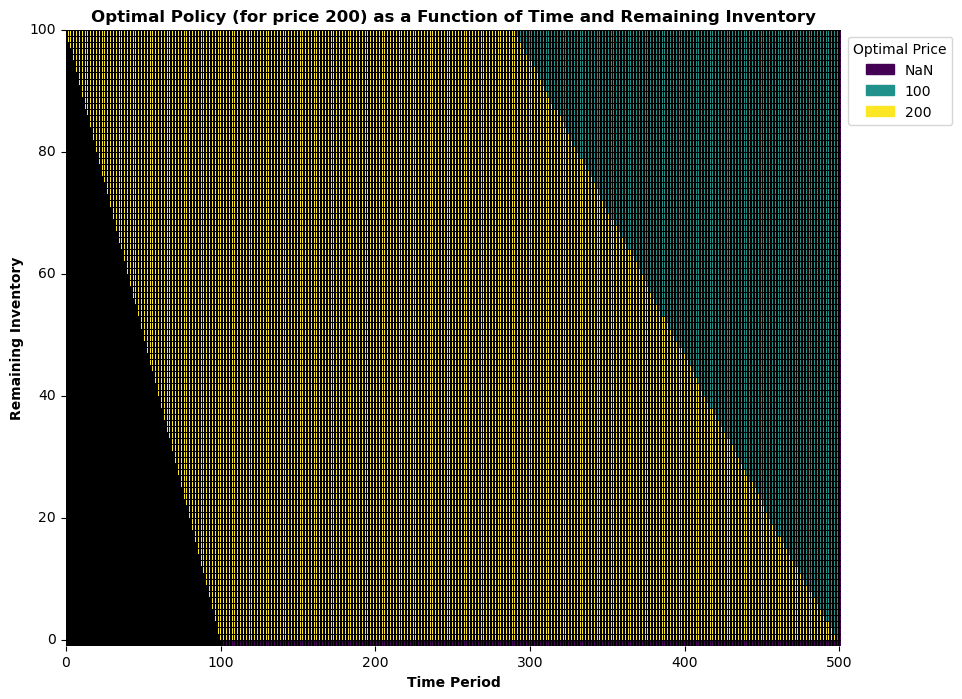

In [19]:
# Plotting the Optimal Policy
df_alpha_2 = pd.DataFrame(alpha2[:, 0, :])

alpha_resampled = df_alpha_2

cmap = plt.cm.get_cmap('viridis', 3)
cmap.set_bad(color='black')

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(alpha_resampled.loc[::-1], cmap=cmap, linewidths=0.4, linecolor='k', cbar=False)

# Create custom legend
legend_patches = [
    mpatches.Patch(color=cmap(0), label='NaN'),
    mpatches.Patch(color=cmap(1), label='100'),
    mpatches.Patch(color=cmap(2), label='200')
]

plt.legend(handles=legend_patches, loc='upper left', bbox_to_anchor=(1, 1), title='Optimal Price')

# Add labels and title
plt.xlabel('Time Period', fontweight='bold')
plt.ylabel('Remaining Inventory', fontweight='bold')
plt.title('Optimal Policy (for price 200) as a Function of Time and Remaining Inventory', fontweight='bold')

# Set custom ticks for x and y axes
plt.xticks(ticks=[0, 100, 200, 300, 400, 500], labels=[0, 100, 200, 300, 400, 500], rotation=0)
plt.yticks(ticks=[100, 80, 60, 40, 20, 0], labels=[0, 20, 40, 60, 80, 100])

plt.savefig('Optimal_Policy_second_problem_200.png')
plt.show()

C:\Users\agdse\AppData\Local\Temp\ipykernel_21732\133330182.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('viridis', 2)


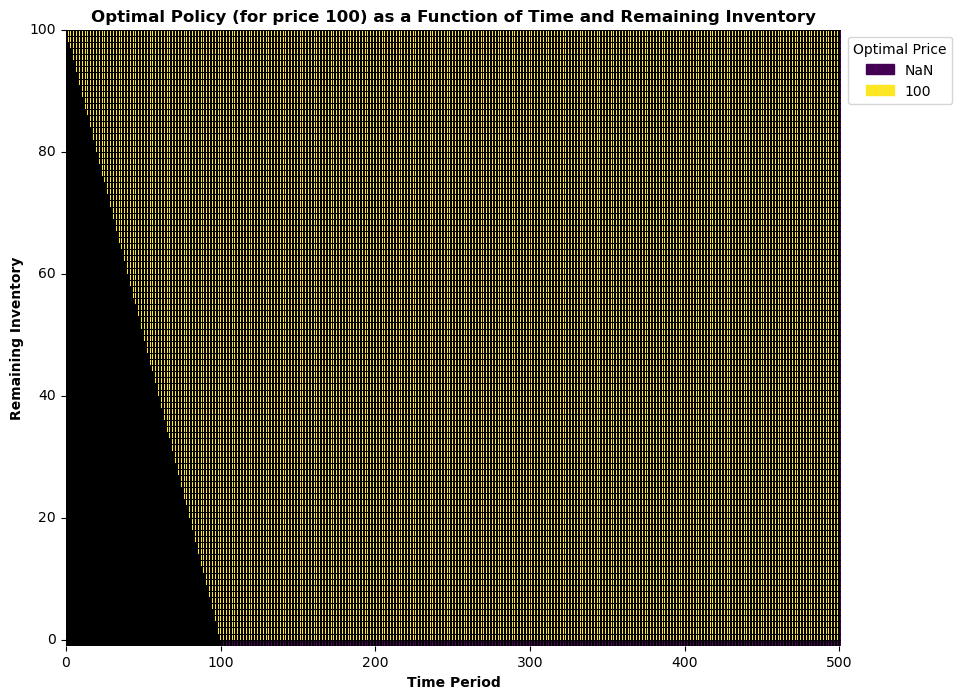

In [20]:
# Plotting the Optimal Policy
df_alpha_3 = pd.DataFrame(alpha2[:, 1, :])

alpha_resampled = df_alpha_3

cmap = plt.cm.get_cmap('viridis', 2)
cmap.set_bad(color='black')

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(alpha_resampled.loc[::-1], cmap=cmap, linewidths=0.4, linecolor='k', cbar=False)

# Create custom legend
legend_patches = [
    mpatches.Patch(color=cmap(0), label='NaN'),
    mpatches.Patch(color=cmap(1), label='100')
]

plt.legend(handles=legend_patches, loc='upper left', bbox_to_anchor=(1, 1), title='Optimal Price')

# Add labels and title
plt.xlabel('Time Period', fontweight='bold')
plt.ylabel('Remaining Inventory', fontweight='bold')
plt.title('Optimal Policy (for price 100) as a Function of Time and Remaining Inventory', fontweight='bold')

# Set ticks for x and y axes
plt.xticks(ticks=[0, 100, 200, 300, 400, 500], labels=[0, 100, 200, 300, 400, 500], rotation=0)
plt.yticks(ticks=[100, 80, 60, 40, 20, 0], labels=[0, 20, 40, 60, 80, 100])

plt.savefig('Optimal_Policy_second_problem_100.png')
plt.show()

C:\Users\agdse\AppData\Local\Temp\ipykernel_21732\1889723529.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('viridis', 2)


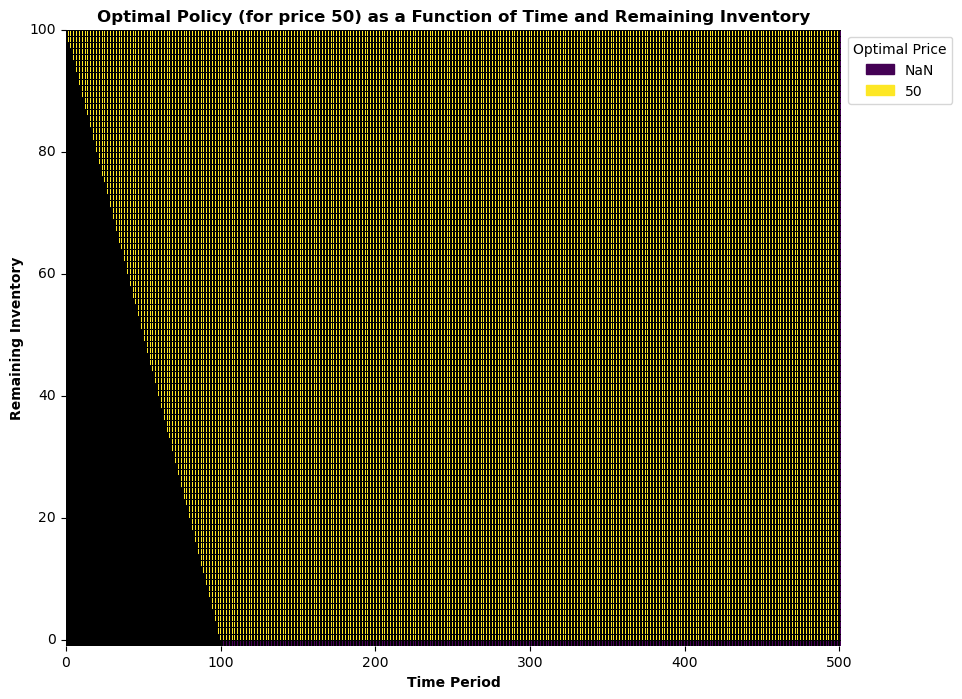

In [21]:
# Plotting the Optimal Policy
df_alpha_3 = pd.DataFrame(alpha2[:, 2, :])

alpha_resampled = df_alpha_3

cmap = plt.cm.get_cmap('viridis', 2)
cmap.set_bad(color='black')

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(alpha_resampled.loc[::-1], cmap=cmap, linewidths=0.4, linecolor='k', cbar=False)

# Create custom legend
legend_patches = [
    mpatches.Patch(color=cmap(0), label='NaN'),
    mpatches.Patch(color=cmap(1), label='50'),
  
]

plt.legend(handles=legend_patches, loc='upper left', bbox_to_anchor=(1, 1), title='Optimal Price')

# Add labels and title
plt.xlabel('Time Period', fontweight='bold')
plt.ylabel('Remaining Inventory', fontweight='bold')
plt.title('Optimal Policy (for price 50) as a Function of Time and Remaining Inventory', fontweight='bold')

# Set ticks for x and y axes
plt.xticks(ticks=[0, 100, 200, 300, 400, 500], labels=[0, 100, 200, 300, 400, 500], rotation=0)
plt.yticks(ticks=[100, 80, 60, 40, 20, 0], labels=[0, 20, 40, 60, 80, 100])

plt.savefig('Optimal_Policy_second_problem_50.png')
plt.show()